In [3]:
## Truncated Gaussian Distribution

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from game.Bankgames import *
from game.plotting import *
from game.distributions import TruncatedGaussian, Uniform, PiecewiseUniform
import nashpy as nh
from tqdm import tqdm

In [4]:
import numpy as np
from itertools import product
gamma_values = np.linspace(0.01, 0.99, 20)  # Choosing 5 values for gamma

def search_eps_signs():
    found_cases = {}
    for gamma_l, gamma_h in tqdm(product(gamma_values, gamma_values)):
        if gamma_l >= gamma_h:
            continue
        taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
        puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
        gtm = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
        
        eps1, eps2 = gtm.eps1, gtm.eps2
        sign_pair = (np.sign(eps1), np.sign(eps2))

        # Store unique cases for each sign combination
        if sign_pair not in found_cases:
            found_cases[sign_pair] = (gamma_l, gamma_h, eps1, eps2)

        # Stop early if we found all sign cases
        if len(found_cases) == 4:
            break
    
    # Print results
    for sign_pair, values in found_cases.items():
        gamma_l, gamma_h, eps1, eps2 = values
        print(f"Sign: {sign_pair}, γ_l: {gamma_l:.2f}, γ_h: {gamma_h:.2f}, eps1: {eps1:.4f}, eps2: {eps2:.4f}")

# Run the search
search_eps_signs()

400it [00:03, 125.38it/s]

Sign: (np.float64(-1.0), np.float64(1.0)), γ_l: 0.01, γ_h: 0.06, eps1: -0.0032, eps2: 0.0021
Sign: (np.float64(1.0), np.float64(1.0)), γ_l: 0.01, γ_h: 0.11, eps1: 0.0036, eps2: 0.0143
Sign: (np.float64(-1.0), np.float64(-1.0)), γ_l: 0.16, γ_h: 0.22, eps1: -0.0052, eps2: -0.0003


In [5]:
# gamma_l, gamma_h = 0.-0, 0.4
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)


# gamma_l, gamma_h = 0.01, 0.06
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)



# gamma_l, gamma_h = 0.01, 0.11
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)

-0.0012391318865149908 0.007652173913043422
-0.003443283517457537 0.0017159203980100287
0.0032134327316002895 0.01353184079601992


In [7]:
# constructed to find the fourth case epsilon_1<0 and epsilon_2 >0
gammas = sorted([0.3, 0.5])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(0.0227956515134468, 0.061516304347826185)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_game_probability_single(game_result, figsize=(12, 5)):
    """
    Plots the probability evolution of actions for Bank 1 and Bank 2.

    Parameters:
    - game_result (tuple): A single tuple containing (p_b1, p_b2, gammas, taus).
    - figsize (tuple): Size of the figure.
    """
    # Unpack the game result
    p_b1, p_b2, gammas, taus = game_result
    
    # Ensure gammas and taus have the same length
    n = len(gammas)
    assert len(taus) == n, "Number of gammas and taus must be equal"

    T, num_actions = p_b1.shape  # Number of time steps and actions
    assert num_actions == n * n, "Mismatch between number of actions and (tau, gamma) pairs"

    time_steps = np.arange(T)  # Time steps
    color_map = plt.cm.hsv
    colors = [color_map(i / num_actions) for i in range(num_actions)]  # Assign distinct colors

    fig, axes = plt.subplots(1, 2, figsize=figsize)  # Two subplots for Bank 1 & Bank 2

    for i, (bank_pw, title, ax) in enumerate(zip([p_b1, p_b2], ["Bank 1", "Bank 2"], axes)):
        for action in range(num_actions):
            tau_idx = action // n
            gamma_idx = action % n
            tau = taus[tau_idx]
            gamma = gammas[gamma_idx]

            # Plot probability evolution
            line, = ax.plot(time_steps, bank_pw[:, action], 
                            color=colors[action], 
                            label=f'(τ={tau:.2f}, γ={gamma:.2f})',
                            linewidth=2)
            
#             # Annotate actions that have significant probability at the final time step
#             if bank_pw[-1, action] >= 0.1:
#                 ax.text(time_steps[-1], bank_pw[-1, action], 
#                         f'τ={tau:.2f}\nγ={gamma:.2f}', 
#                         color=line.get_color(), 
#                         fontweight='bold',
#                         horizontalalignment='left',
#                         verticalalignment='center')

        # Customize plot
        ax.set_title(f'{title} Action Probabilities Over Time')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Probability')
        ax.set_ylim(0, 1)
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# PLOTS TODO n = 4 actions BELOW

1) Known Matrix, Full matrix known


Game with n = 4 actions (2 gammas) 
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- epsilon_1>0, epsilon_2>0 ; 1 pure NE
- epsilon_1<0, epsilon_2<0 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+, -)

---

1) Sampled Matrix (Fresh matrix estimated in each round) 

Game with n = 4 actions (2 gammas)
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- 1 pure NE
- 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+,-)
 
Fraction of convergence plots
- Fix distribution, fix gamma (defines an instance of the one-shot game)
- For a fixed initilaization, check convergence across randomness in sampling (fresh estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (fresh estimate for A)


- For a fixed initilaization, check convergence check convergence across randomness in sampling (moving estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (moving estimate for A)

# PLOTS TODO for larger number of actions

vary distribution (fix truncated gaussian some values)
precified values of gamma
vary initializations

## Case 1 : epsilon_1 > 0, epsilon_2 < 0, 
## 3 NE - 2 pure, 1 mixed

# Using truncgauss here

Three types of hedge dynamics curves
1) hedge on known matrix
2) hedge on fresh sampled each time
3) hedge on moving average

In [6]:
gammas = sorted([0.1, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.6
sigma = 0.2
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1 and epsilon2

0.03311695444624768 -0.12479184642812025


In [7]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

3

[[[0, 0, 1, 0], [0, 0, 1, 0]],
 [[0, 1, 0, 0], [0, 1, 0, 0]],
 [[0, 0.7902779689107038, 0.2097220310892962, 0],
  [0, 0.7902779689107038, 0.2097220310892962, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.])),
 (array([0., 0., 1., 0.]), array([0., 0., 1., 0.])),
 (array([0.        , 0.79027797, 0.20972203, 0.        ]),
  array([0.        , 0.79027797, 0.20972203, 0.        ]))]

In [44]:
# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[0.00000000e+00 1.00988273e-27 1.00000000e+00 0.00000000e+00] [0.00000000e+00 7.89645439e-28 1.00000000e+00 0.00000000e+00]


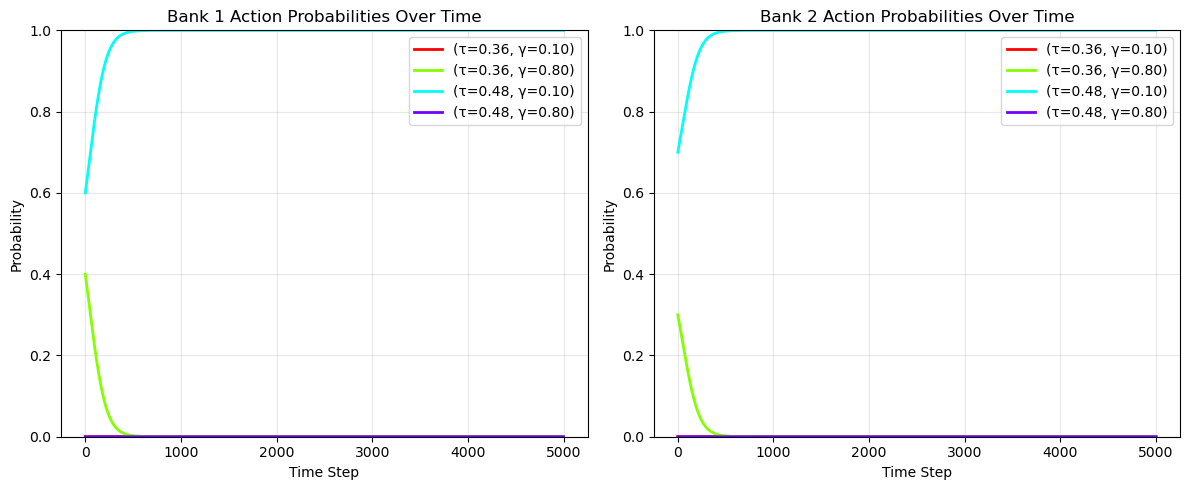

In [45]:
plot_game_probability_single((b1,b2,gammas,taus))

In [46]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[0.00000000e+00 1.38521876e-27 1.00000000e+00 0.00000000e+00] [0.00000000e+00 1.08795173e-27 1.00000000e+00 0.00000000e+00]


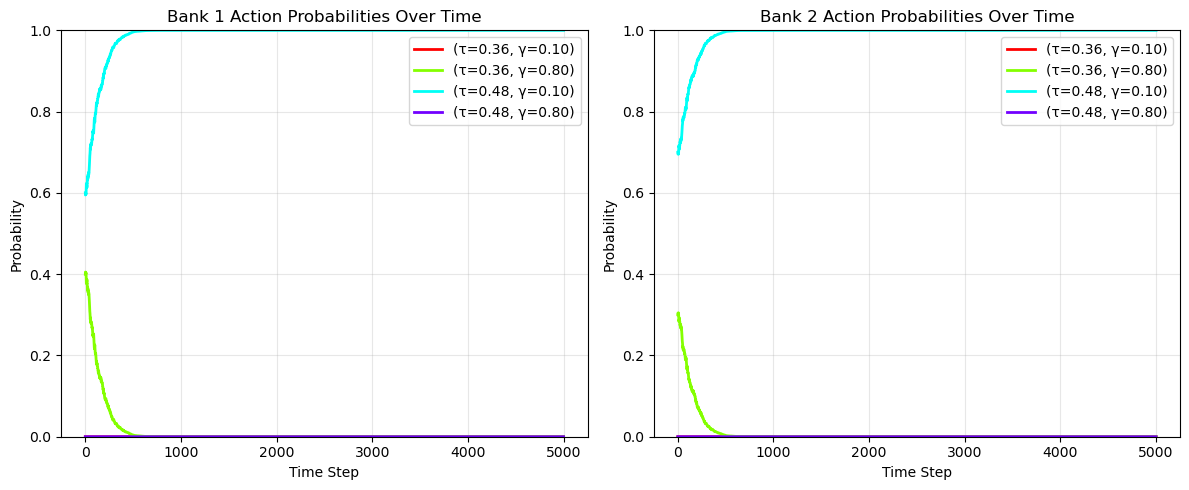

In [47]:
plot_game_probability_single((b1,b2,gammas,taus)) # also goes to the same pure symmetric NE, a bit noisy

In [48]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[0.00000000e+00 6.62603345e-28 1.00000000e+00 0.00000000e+00] [0.00000000e+00 5.18319565e-28 1.00000000e+00 0.00000000e+00]


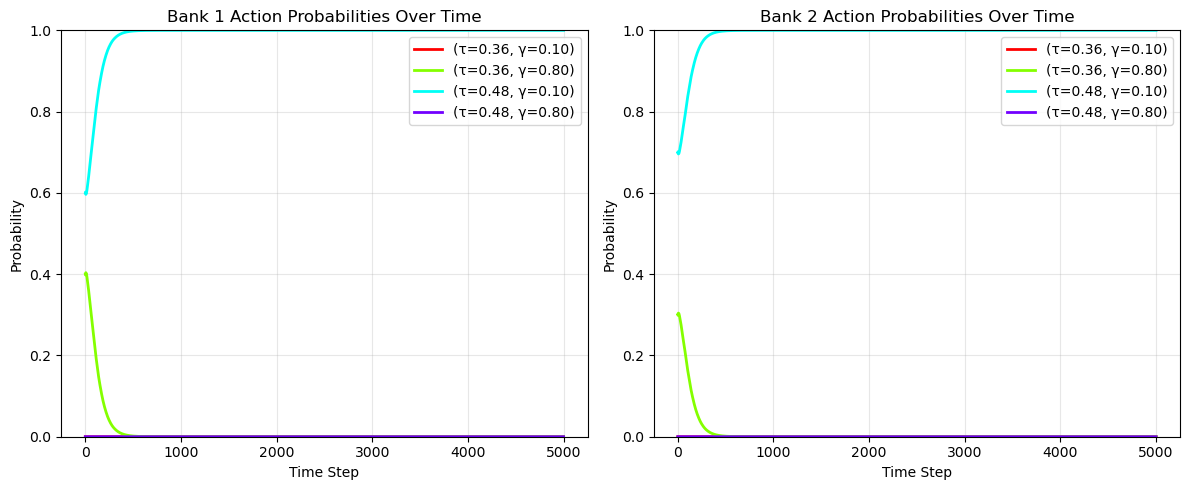

In [49]:
plot_game_probability_single((b1,b2,gammas,taus))

## Case 2 : epsilon_1 < 0, epsilon_2 > 0, 
## 3 NE - 2 pure, 1 mixed

## Using piecewise uniform here

In [9]:
gammas = sorted([0.3, 0.4])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(-0.0012391318865149908, 0.007652173913043422)

In [10]:
display(len(gtm.NE_theory), gtm.NE_theory)

display(len(gtm.NE_se), gtm.NE_se)

3

[[[0, 1, 0, 0], [0, 0, 1, 0]],
 [[0, 0, 1, 0], [0, 1, 0, 0]],
 [[0, 0.8606356968215123, 0.1393643031784877, 0],
  [0, 0.8606356968215123, 0.1393643031784877, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 0., 1., 0.])),
 (array([0., 0., 1., 0.]), array([0., 1., 0., 0.])),
 (array([0.        , 0.86063556, 0.13936444, 0.        ]),
  array([0.        , 0.86063556, 0.13936444, 0.        ]))]

In [53]:
# run hedge on known matrix
T = 100000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])
# Goes to assymetric Pure NE, (tau_l, gamma_h) for bank 1 and (tau_h, gamma_l) for bank2 as predicted in theory

[0.00000000e+00 1.00000000e+00 1.83577565e-29 0.00000000e+00] [0.00000000e+00 1.70851743e-05 9.99982915e-01 0.00000000e+00]


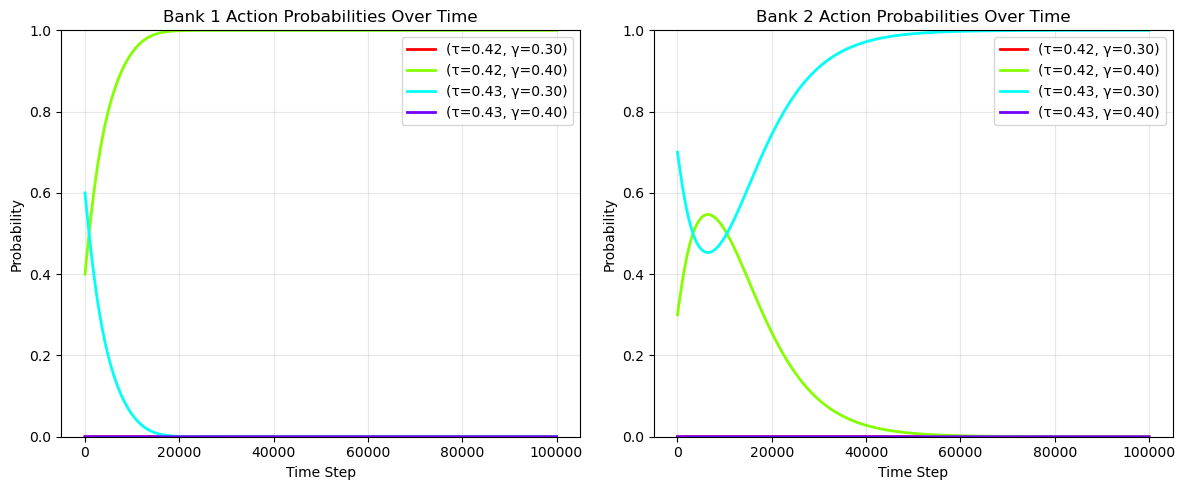

In [54]:
plot_game_probability_single((b1,b2,gammas,taus))

In [55]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=puf, num_samples=1)

T = 100000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# Goes to assymetric Pure NE, (tau_l, gamma_h) for bank 1 and (tau_h, gamma_l) for bank2 as predicted in theory

[0.00000000e+00 1.00000000e+00 7.75426739e-29 0.00000000e+00] [0.00000000e+00 5.65111723e-05 9.99943489e-01 0.00000000e+00]


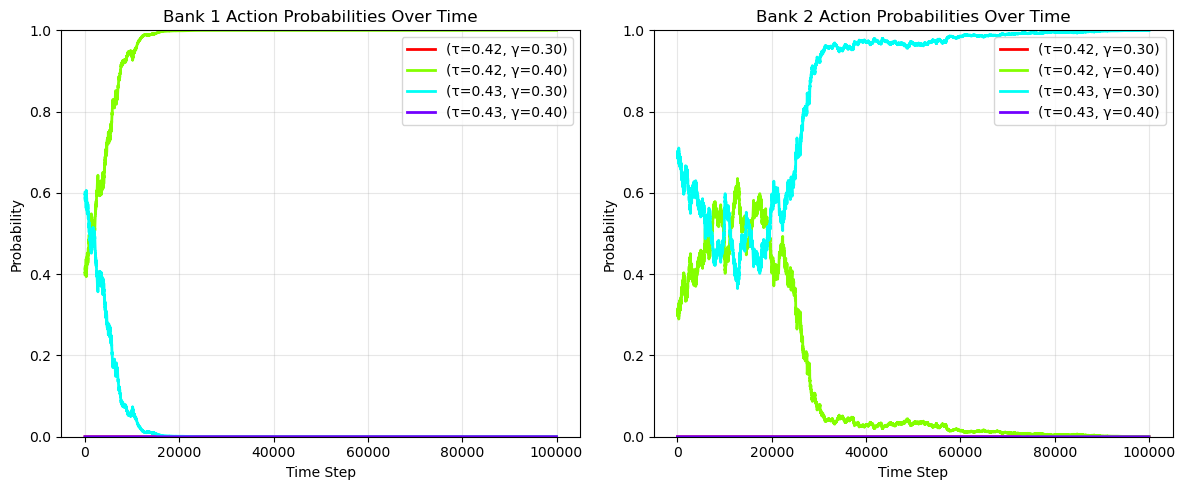

In [30]:
plot_game_probability_single((b1,b2,gammas,taus))

In [56]:
gfe = GameMovingAvg(gammas=gammas, taus=taus, dist=puf, num_samples=1)

T = 100000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# Goes to assymetric Pure NE, (tau_l, gamma_h) for bank 1 and (tau_h, gamma_l) for bank2 as predicted in theory

[0.0000000e+00 1.0000000e+00 7.6080287e-30 0.0000000e+00] [0.00000000e+00 3.90030345e-04 9.99609970e-01 0.00000000e+00]


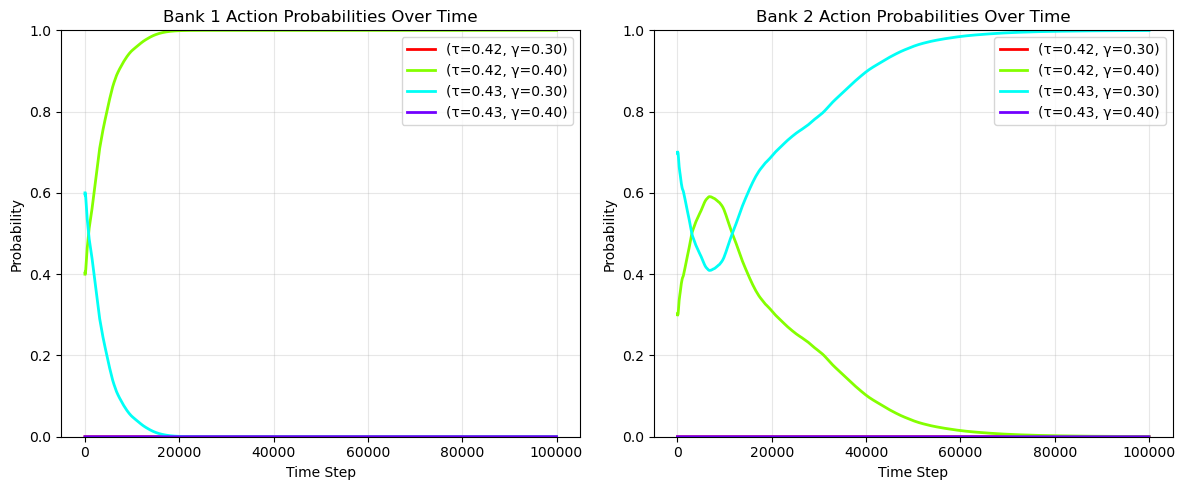

In [57]:
plot_game_probability_single((b1,b2,gammas,taus))

In [9]:
# Piecewise uniform sampling investigation
gammas = sorted([0.1, 0.6])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)
gtm.eps1, gtm.eps2

(0.05292857139560289, 0.10209523809523804)

In [10]:
taus[0], taus[1]

(0.3846153846153846, 0.47619047619047616)

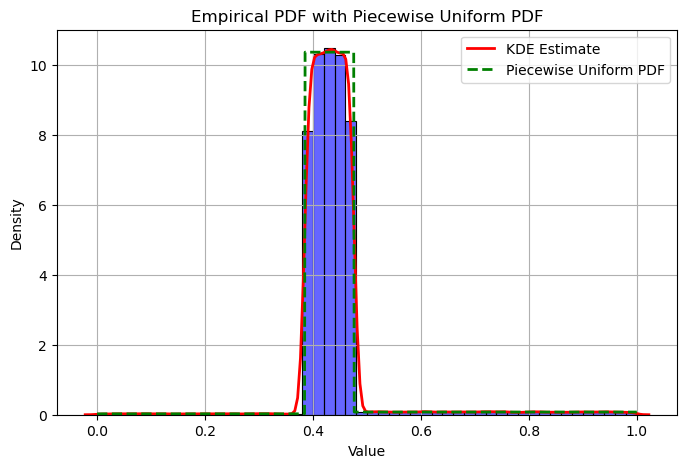

In [59]:
# @all ignore this block it was to check the sampling correctness with the actual probability, which is now fixed

def plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h, bins=50, density=True):
    plt.figure(figsize=(8, 5))
    sns.histplot(samples, bins=bins, kde=False, stat="density", alpha=0.6, color='b', edgecolor='black')
    sns.kdeplot(samples, color='r', linewidth=2, label='KDE Estimate')
    
    # Plot piecewise uniform PDF
    
    y_values = np.linspace(0, 1, 1000)
    pdf_values = [piecewise_uniform_pdf(y, tau_l, tau_h) for y in y_values]
    plt.plot(y_values, pdf_values, color='g', linestyle='--', linewidth=2, label='Piecewise Uniform PDF') # true
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Empirical PDF with Piecewise Uniform PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define piecewise uniform PDF function
def piecewise_uniform_pdf(y, tau_l, tau_h):
    if 0 <= y < tau_l:
        return 0.01 / tau_l
    elif tau_l <= y < tau_h:
        return 0.95 / (tau_h - tau_l)
    elif tau_h <= y <= 1:
        return 0.04 / (1 - tau_h)
    else:
        return 0

gammas = sorted([0.1, 0.6])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

tau_l, tau_h = taus
samples = puf.get_samples(100000)

      
# Assuming arr contains the samples
plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h)

## Case 3: epsilon_1 < 0, epsilon_2 < 0

## Single Pure NE, symmetric (tau_h, gamma_l)

# using trungauss here

In [11]:
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.6
sigma = 0.2
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1<0 and epsilon2<0

-0.12134951137879568 -0.22492712153259348


In [63]:
display(len(gtm.NE_theory), gtm.NE_theory)

display(len(gtm.NE_se), gtm.NE_se)

1

[[[0, 0, 1, 0], [0, 0, 1, 0]]]

1

[(array([0., 0., 1., 0.]), array([0., 0., 1., 0.]))]

In [64]:
# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[0.00000000e+00 1.15321507e-49 1.00000000e+00 0.00000000e+00] [0.00000000e+00 7.96310351e-50 1.00000000e+00 0.00000000e+00]


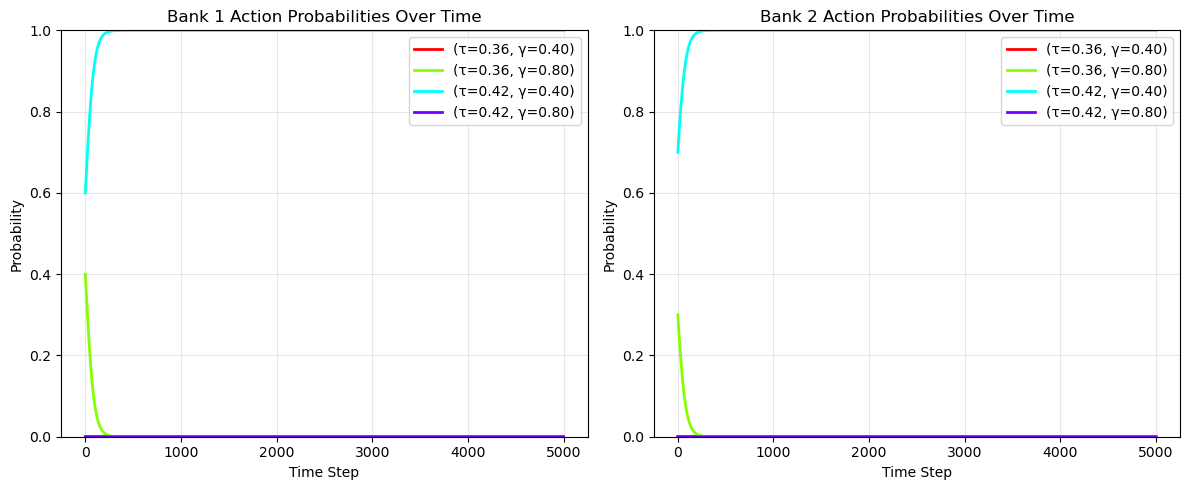

In [65]:
plot_game_probability_single((b1,b2,gammas,taus))

In [66]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[0.00000000e+00 1.52941191e-49 1.00000000e+00 0.00000000e+00] [0.00000000e+00 1.05776961e-49 1.00000000e+00 0.00000000e+00]


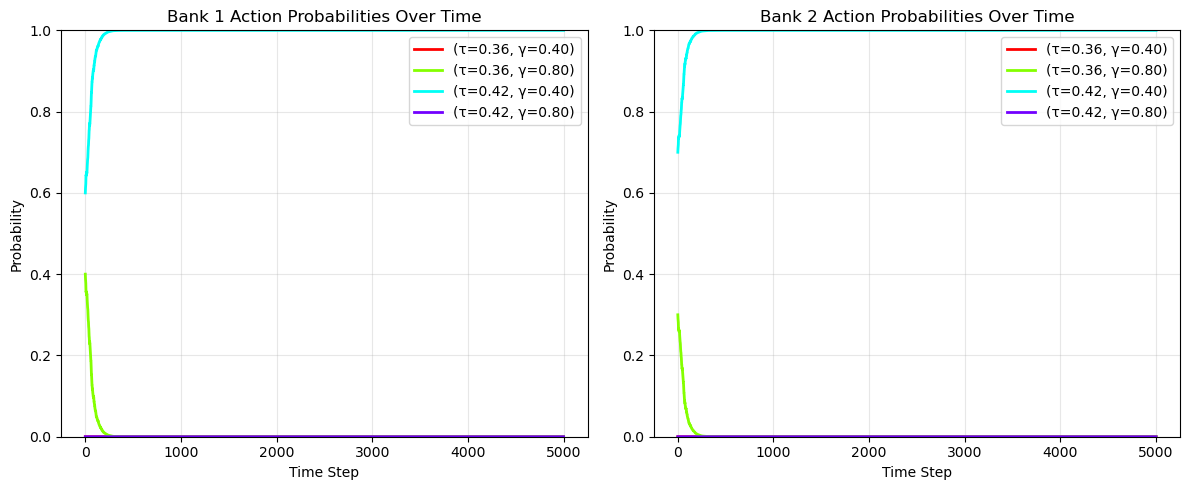

In [67]:
plot_game_probability_single((b1,b2,gammas,taus))

In [70]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l

[0.00000000e+00 1.85215773e-51 1.00000000e+00 0.00000000e+00] [0.00000000e+00 1.26649403e-51 1.00000000e+00 0.00000000e+00]


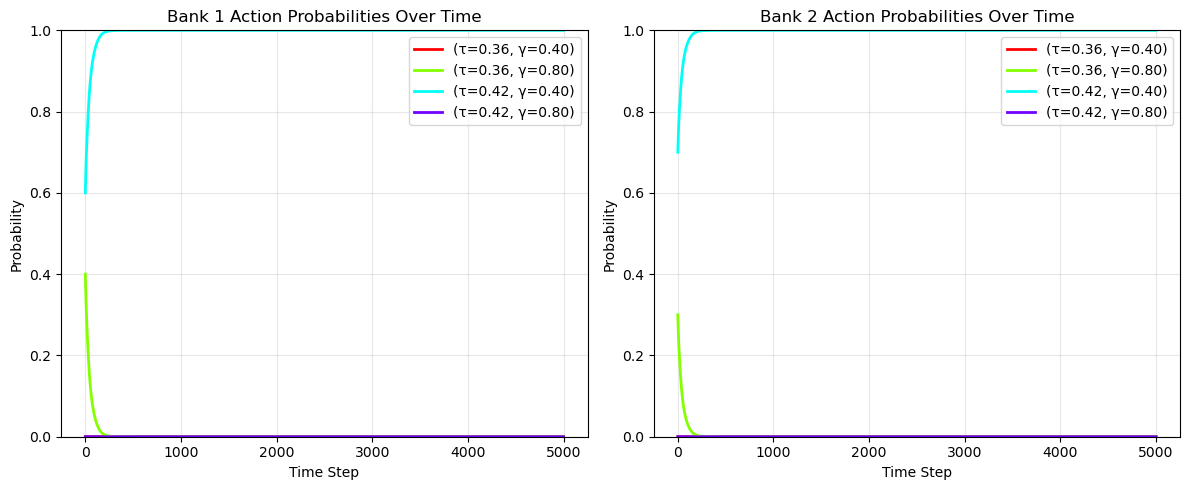

In [71]:
plot_game_probability_single((b1,b2,gammas,taus))

## Case 4: epsilon_1 > 0, epsilon_2 > 0

## Single Pure NE, symmetric (tau_l, gamma_h)

In [21]:
gammas = sorted([0.1, 0.5])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(0.04014285742558564, 0.07947619047619046)

In [22]:
display(len(gtm.NE_se), gtm.NE_se) # 1 pure NE only in the one shot game
display(len(gtm.NE_theory), gtm.NE_theory)

1

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.]))]

1

[[[0, 1, 0, 0], [0, 1, 0, 0]]]

In [23]:
# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l

[0.00000000e+00 9.99999999e-01 1.14994390e-09 0.00000000e+00] [0.00000000e+00 9.99999998e-01 2.37146053e-09 0.00000000e+00]


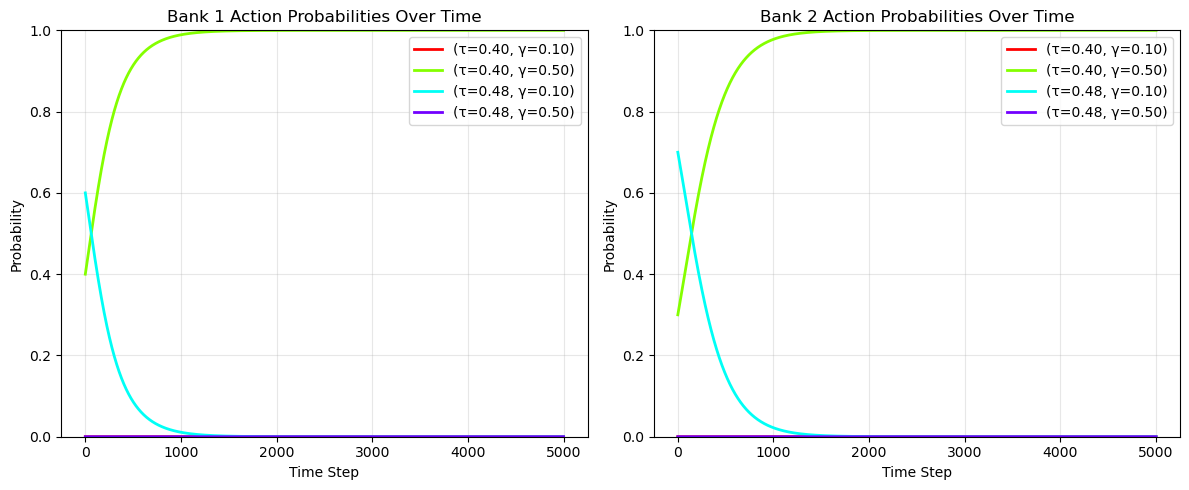

In [24]:
plot_game_probability_single((b1,b2,gammas,taus))

In [27]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=puf, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l

[0.00000000e+00 9.99999999e-01 1.45114531e-09 0.00000000e+00] [0.00000000e+00 9.99999997e-01 2.98676303e-09 0.00000000e+00]


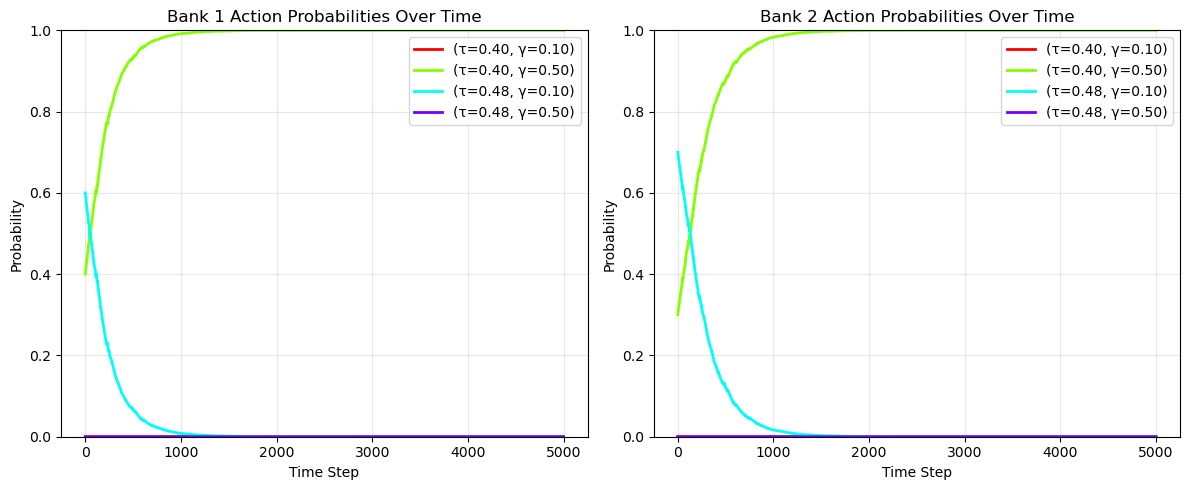

In [28]:
plot_game_probability_single((b1,b2,gammas,taus))

In [31]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=puf, num_samples=1)

# run hedge on known matrix
T = 5000
eta = 0.1
p_b1 = np.array([0., 0.4, 0.6, 0.])
p_b2 = np.array([0., 0.3, 0.7, 0.])


b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l

[0.00000000e+00 9.99999999e-01 1.13644448e-09 0.00000000e+00] [0.00000000e+00 9.99999998e-01 2.35275103e-09 0.00000000e+00]


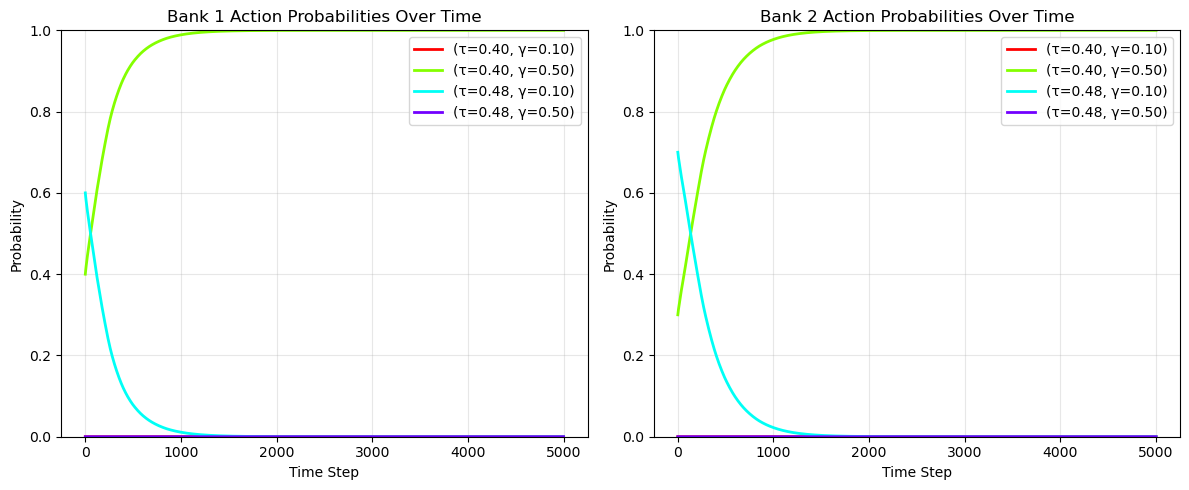

In [32]:
plot_game_probability_single((b1,b2,gammas,taus))